In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser
%matplotlib inline

### DEFINE PROBLEM

Mencari tahu product apa yang bisa laku terjual di ecommerce.

### GOALS 

- Memperkirakan Category barang yang dijual. Kemudian dari situ baru ditentukan product nya.
- Menentukan Target penjualan sesuai analisis yang nanti akan dilakukan.
- Memperkirakan estimasi diskon yang layak diberikan.

In [2]:
df = pd.read_csv("ecommerce.csv",index_col=0)
df

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...,...
175,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.0,FREE Shipping,men
176,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women
177,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.0,FREE Shipping,men
178,Watches,"T5 Watch For Men [Rubber,Chronograph]-H3397G-B",440.0,115.49,40.0,86.0,Eligible for FREE Shipping,men


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 179
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           609 non-null    object 
 1   product            609 non-null    object 
 2   Original_price     583 non-null    float64
 3   price              609 non-null    float64
 4   perc_of_unit_sold  522 non-null    float64
 5   rating             427 non-null    float64
 6   shpping_rate       567 non-null    object 
 7   gender             581 non-null    object 
dtypes: float64(4), object(4)
memory usage: 42.8+ KB


In [4]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
category,609,7,Watches,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,609,602,Lacoste Casual Shoe for Men Size 44 EU - White,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original_price,583,NaN,NaN,NaN,864.498,1803.37,42,273,499,980,29970
price,609,NaN,NaN,NaN,339.434,285.416,21.4,140.98,262.49,444.99,3220
perc_of_unit_sold,522,NaN,NaN,NaN,57.6782,25.4349,2,36.25,60,79,99
rating,427,NaN,NaN,NaN,87.808,11.4223,20,82,88,96,100
shpping_rate,567,2,FREE Shipping,356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,581,3,men,338,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Dapat dilihat dari analisa deskriptif bahwa, category produk yang paling laku secara keseluruhan adalah jam tangan.
- Kemudian untuk product spesifiknya terlihat malah sepatu "Lacoste Casual Shoe for Men Size 44 EU - White" lebih menjadi pilihan, padahal category terbanyak adalah Category jam tangan. Hal ini bisa terjadi kemungkinan disebabkan oleh pembeli jam tangan sangat banyak namun tersebar ke berbagai jenis jam tangan.
- Apabila dilihat dari rata-rata, bisa disimpulkan bahwa, rata-rata diskon(original_price ==> price) berkisar di angka 39.3 %
- Terlihat bahwa kemungkinan suatu item itu terjual rata-rata adalah 58%, dan memiliki kemungkinan terkecil untuk terjual adalah 2% dan kemungkinan terbesarnya adalah 99%. Semua ini tergantung pada apa category dan product yang dijual, harus relevan dengan keinginan pasar, serta target pasarnya harus jelas.


In [5]:
df.isna().sum()

category               0
product                0
Original_price        26
price                  0
perc_of_unit_sold     87
rating               182
shpping_rate          42
gender                28
dtype: int64

In [6]:
# df[df["category"]=="Athletic Shoes"].fillna(df[df["category"]=="Athletic Shoes"]["Original_price"].mean(),inplace=True)
# df[df["category"]=="Perfumes & Fragrances"].fillna(df[df["category"]=="Perfumes & Fragrances"]["Original_price"].mean(),inplace=True)
# df[df["category"]=="Sportswear"].fillna(df[df["category"]=="Sportswear"]["Original_price"].mean(),inplace=True)
# df[df["category"]=="Watches"].fillna(df[df["category"]=="Watches"]["Original_price"].mean(),inplace=True)
## missing value diisi dengan masing-masing rata-rata dari harga untuk tiap kategori.

In [7]:
# df[df["perc_of_unit_sold"].isnull()]

In [8]:
# df[df["category"]=="Athletic Shoes"].fillna(df[df["category"]=="Athletic Shoes"]["perc_of_unit_sold"].mean(),inplace=True)
# df[df["category"]=="Casual & Dress Shoes"].fillna(df[df["category"]=="Casual & Dress Shoes"]["perc_of_unit_sold"].mean(),inplace=True)
# df[df["category"]=="Eyewear"].fillna(df[df["category"]=="Eyewear"]["perc_of_unit_sold"].mean(),inplace=True)
# df[df["category"]=="Sportswear"].fillna(df[df["category"]=="Sportswear"]["perc_of_unit_sold"].mean(),inplace=True)
# df[df["category"]=="Wallets"].fillna(df[df["category"]=="Wallets"]["perc_of_unit_sold"].mean(),inplace=True)
# df[df["category"]=="Watches"].fillna(df[df["category"]=="Watches"]["perc_of_unit_sold"].mean(),inplace=True)
## saya memilih untuk mengisi missing value pada kolom perc_of unit sold dengan :
## rata-rata tapi, di pisah berdasarkan categorynya. Karena itu yang paling masuk akal untuk dilakukan

In [9]:
# df["rating"].dropna(inplace=True)
## karena rating tidak bisa dikira-kira, itu adalah kuasa customer

In [10]:
# df["shpping_rate"].fillna("Free Shipping",inplace=True)
## karena mayoritas memilih free shipping.

In [11]:
# df["gender"].dropna(inplace=True)
## saya memutuskan untuk drop missing value pada kolom gender, dikarenakan, benar-benar tidak bisa ditebak
## karena bisa saja yang dibeli adalah item pria, namun yang membelikan adalah seorang wanita
## begitu juga sebaliknya

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 178
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           351 non-null    object 
 1   product            351 non-null    object 
 2   Original_price     351 non-null    float64
 3   price              351 non-null    float64
 4   perc_of_unit_sold  351 non-null    float64
 5   rating             351 non-null    float64
 6   shpping_rate       351 non-null    object 
 7   gender             351 non-null    object 
dtypes: float64(4), object(4)
memory usage: 24.7+ KB


# ANALISA DATA

In [14]:
df["Diskon"] = (df["price"]/df["Original_price"]).round(2)*100
df

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender,Diskon
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men,71.0
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men,83.0
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men,66.0
6,Athletic Shoes,Adidas Duramo 9 Running Shoes For Men - Core B...,319.0,233.98,68.0,100.0,FREE Shipping,men,73.0
10,Athletic Shoes,"NiKE Tanjun Sneaker for Women, Grey - 38 EU",359.0,225.65,69.0,80.0,FREE Shipping,women,63.0
...,...,...,...,...,...,...,...,...,...
174,Watches,"JBW Laurel Watch for Women , Stainless Steel ,...",4110.0,706.99,53.0,92.0,FREE Shipping,women,17.0
175,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.0,FREE Shipping,men,22.0
176,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women,74.0
177,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.0,FREE Shipping,men,39.0


In [15]:
Category_Fav= pd.crosstab(index = df["category"],columns='TOTAL')
Category_Fav.sort_values('TOTAL',ascending=False).head(10)
## Terlihat bahwa memang jam adalah kategory favorit

col_0,TOTAL
category,
Watches,116
Eyewear,99
Perfumes & Fragrances,60
Athletic Shoes,38
Wallets,20
Casual & Dress Shoes,9
Sportswear,9


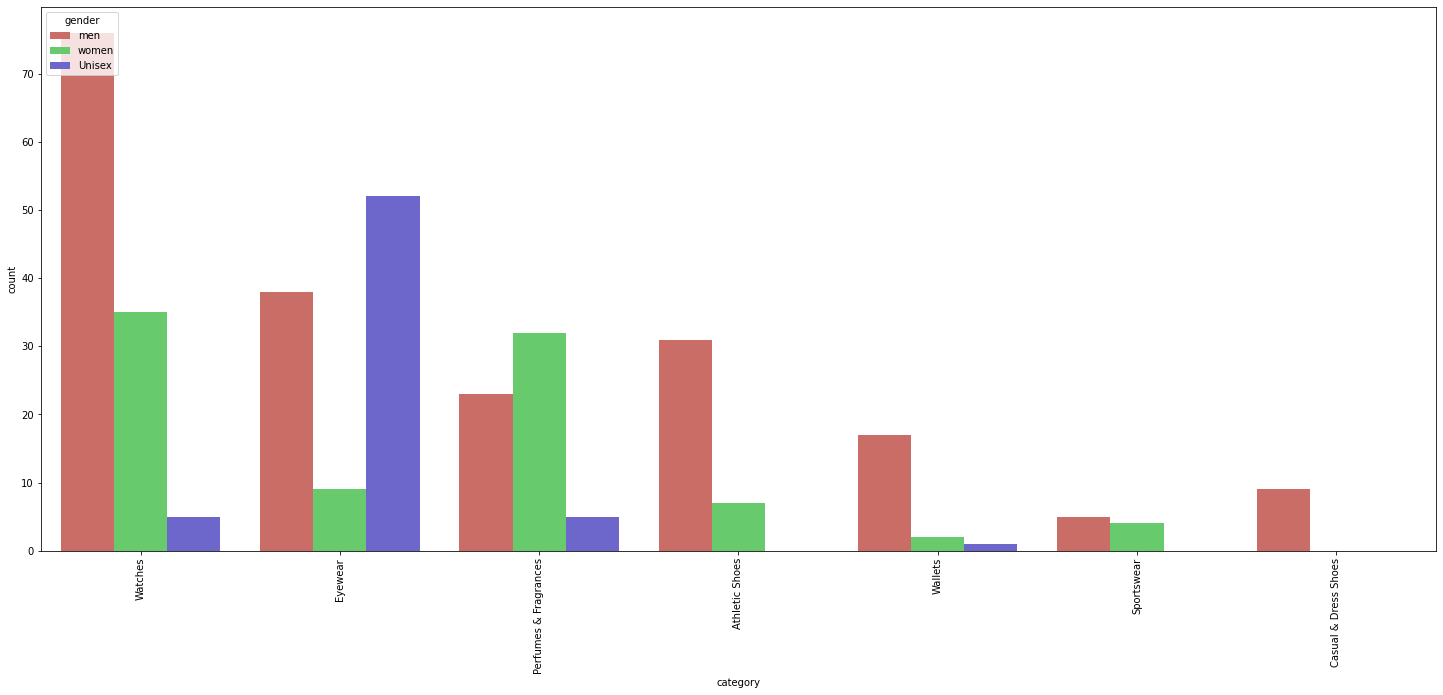

In [16]:
plt.figure(figsize=(25,10))
fig = sns.countplot(x=df['category'], hue=df['gender'], palette="hls", order = df['category'].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)
# dapat dilihat untuk masing masing gender, category jam dan kacamata mendominasi.

In [17]:
product_Fav_byCategory= pd.crosstab(index = [df["category"],df["product"]],columns='TOTAL')
product_Fav_byCategory.sort_values('TOTAL',ascending=False).head(10)
## tapi untuk jumlah yang terjual karena data hanya sedikit, terbanyak hanya terjual 1.

col_0                                                              TOTAL
category       product                                                  
Athletic Shoes Adidas Asweerun Running Shoes For Men - Core Black      1
Wallets        guess Men's Wallet 31GUE13142-Black                     1
Watches        Akribos XXIV Men's Brown Dial Leather Band Watc...      1
               Akribos XXIV Men's Black Dial Stainless Steel B...      1
               Akribos XXIV Men's Black Dial Metal Band Watch ...      1
               Akribos XXIV Men's Black Dial Leather Band Watc...      1
               Akribos XXIV Men's Black Dial Leather Band Watc...      1
Wallets        guess Men's Wallet 31GUE13150-Black                     1
               guess Men's Wallet 31GUE13145-Brown                     1
               guess Men's Wallet 31GUE13143-Black                     1

In [18]:
discount = pd.crosstab(index = [df["product"],df["Diskon"]],columns='TOTAL')
discount.sort_values('TOTAL',ascending=False)
## Dapat dilihat untuk masing-masing produk selayaknya diberikan diskon berapa. Bisa dilihat semua dari dalam tabel


,col_0,TOTAL
product,Diskon,
Adidas Asweerun Running Shoes For Men - Core Black,76.0,1
"Polaroid Aviator Sunglasses For Unisex - Multi Color , PLD 6012/N",34.0,1
"Polaroid Sunglasses For Men Pld 1016/Sdl550Lb, Dark Green Lens, Square Frame",67.0,1
"Polaroid Sunglasses , for Women , Mixed , Aviator Lens Shape - Pld 2043/S-80761M9",64.0,1
"Polaroid Sunglass for Men , Grey Lens , PLD 2059/S 003 60",54.0,1
...,...,...
"Emporio Armani Sportivo Men'S Black Dial Stainless Steel Band Watch Ar2457, Analog Quartz, Analog",71.0,1
"Emporio Armani Rectangle Sunglasses for Men , Grey Lenses , 8053672481389",58.0,1
"Emporio Armani Men'S White Dial Stainless Steel Band Watch Ar1839, Quartz, Analog",59.0,1


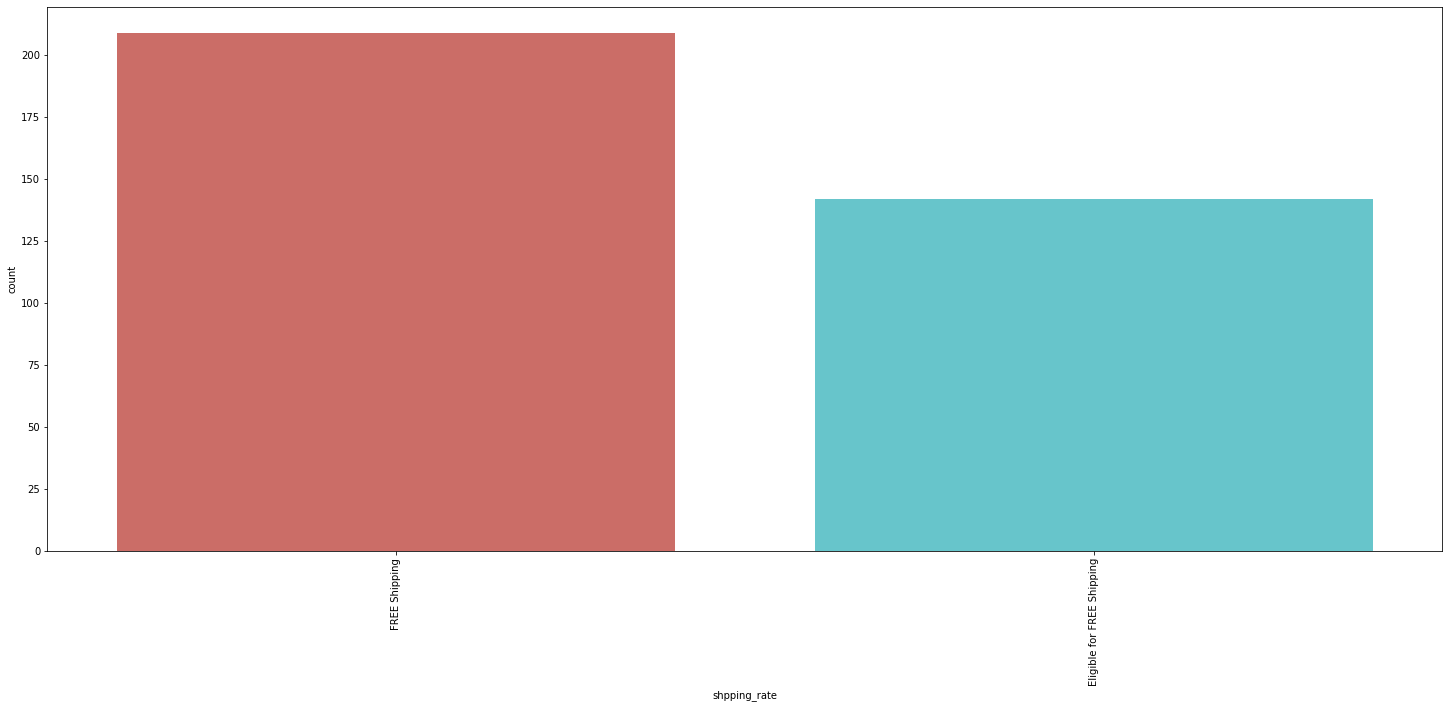

In [19]:
plt.figure(figsize=(25,10))
fig = sns.countplot(x=df['shpping_rate'],palette="hls", order = df['shpping_rate'].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)
## dapat dilihat bahwa banyak yang lebih tertarik menggunakan free shipping
## padahal apabila ada opsi untuk free shipping or not, kita tidak rugi apa apa, karena shipping ditanggung pembeli
## namun lebih baik free shipping, karena customer cenderung akan membeli apabila melihat promos free shipping, karena terkesan akan lebih murah.

## Kesimpulan
- Jam tangan prima menjadi barang paling laku.
- Untuk Kacamata unisex, menjadi terlaku diantara semua category untuk gender unisex.
- Untuk Diskon yang dapat diberikan untuk masing-masing category dan produk dapat dilihat pada crosstab yang dibuat.
- Gender pria dapat menjadi target pasar, karena kebanyakan produk yang dibeli, adalah produk pria.
- Kemudian untuk spesifik produk apa yang paling laku, tidak dapat ditentukan, karena data masih sedikit, jadi total penjualan terbanyak juga masih cuman 1, tapi untuk secara umum, bisa dipilih untuk menjual berdasarkan category dan produk.

## Saran
- Untuk memutuskan apa yang akan dijual tidak bisa spesifik, namun bisa berdasarkan kategori dan product, jadi dijual secara umum kategori dan produk tertentu yang tergolong penjaualannya paling banyak. Misalkan jam tangan dan kacamata.
- item untuk gender pria, lebih banyak dibeli, sehingga jualah item untuk gender pria dan opsi lainnya, juallah item untuk unisex, karena bisa menjangkau pasar lebih luas.
Untuk estimasi diskon untuk tiap produk, dapat dilihat pada tabel crosstab.
Untuk para penjual,disarankan untuk menggunakan fitur free shipping, walaupun tidak ada untuk penjual secara nominal, namun apabila ada fitur free shipping, customer cendrung akan tersugesti untuk membeli.